In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
data=pd.read_csv(r'C:\Users\DELL\Downloads\train (1).csv')

In [3]:
#display the dataset
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [4]:
data.drop('name',axis=1,inplace=True)

In [5]:
data.drop('country',axis=1,inplace=True)

In [6]:
# Since player_id is needed hence I am replacing 'PLID_' with empty string and converting into int
data['player_id'] = data['player_id'].str.replace('PLID_', '')
data['player_id'] = data['player_id'].astype('int64')

In [7]:
# Convert height to numeric (assuming height is in feet and inches format)
def height_to_numeric(height_str):
    feet, inches = height_str.split("'")
    total_inches = int(feet) * 12 + int(inches)
    return total_inches

data['height'] = data['height'].apply(height_to_numeric)

# Convert weight to numeric (assuming weight is in lbs)
data['weight'] = data['weight'].str.replace('lbs', '').astype(float)

In [8]:
data

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,4964,23,M,74,176.0,77.0,58.0,47.0,59.0,41.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,11234,18,M,70,148.0,54.0,69.0,70.0,62.0,53.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,19127,16,F,74,172.0,34.0,43.0,45.0,69.0,49.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,17467,27,M,71,165.0,79.0,73.0,76.0,86.0,81.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,9661,19,F,68,158.0,47.0,61.0,74.0,57.0,49.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,10956,20,M,72,161.0,60.0,48.0,62.0,60.0,40.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,17290,18,F,70,165.0,53.0,68.0,59.0,73.0,24.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,5193,17,M,72,172.0,56.0,73.0,62.0,50.0,47.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,12173,20,F,70,150.0,71.0,69.0,70.0,51.0,56.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [9]:
# Display the shape of the dataset 
data.shape

(13994, 28)

In [10]:
# Display basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  int64  
 1   age                        13994 non-null  int64  
 2   gender                     13975 non-null  object 
 3   height                     13994 non-null  int64  
 4   weight                     13577 non-null  float64
 5   ball_controlling_skills    13581 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13970 non-null  float64
 9   penalties_conversion_rate  13964 non-null  float64
 10  mental_strength            13966 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

In [11]:
# Summary statistics
data.describe()

,player_id,age,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13994.000000,13994.000000,13577.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,11724.295055,21.135844,71.590467,165.621492,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,6742.834492,5.162719,18.190359,15.449959,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,2.000000,16.000000,17.000000,110.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,5917.250000,17.000000,69.000000,154.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,11744.500000,20.000000,71.000000,165.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,17566.750000,24.000000,73.000000,176.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,23324.000000,61.000000,1188.000000,243.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [12]:
# Check for missing values
data.isnull().sum()

player_id                      0
age                            0
gender                        19
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int64

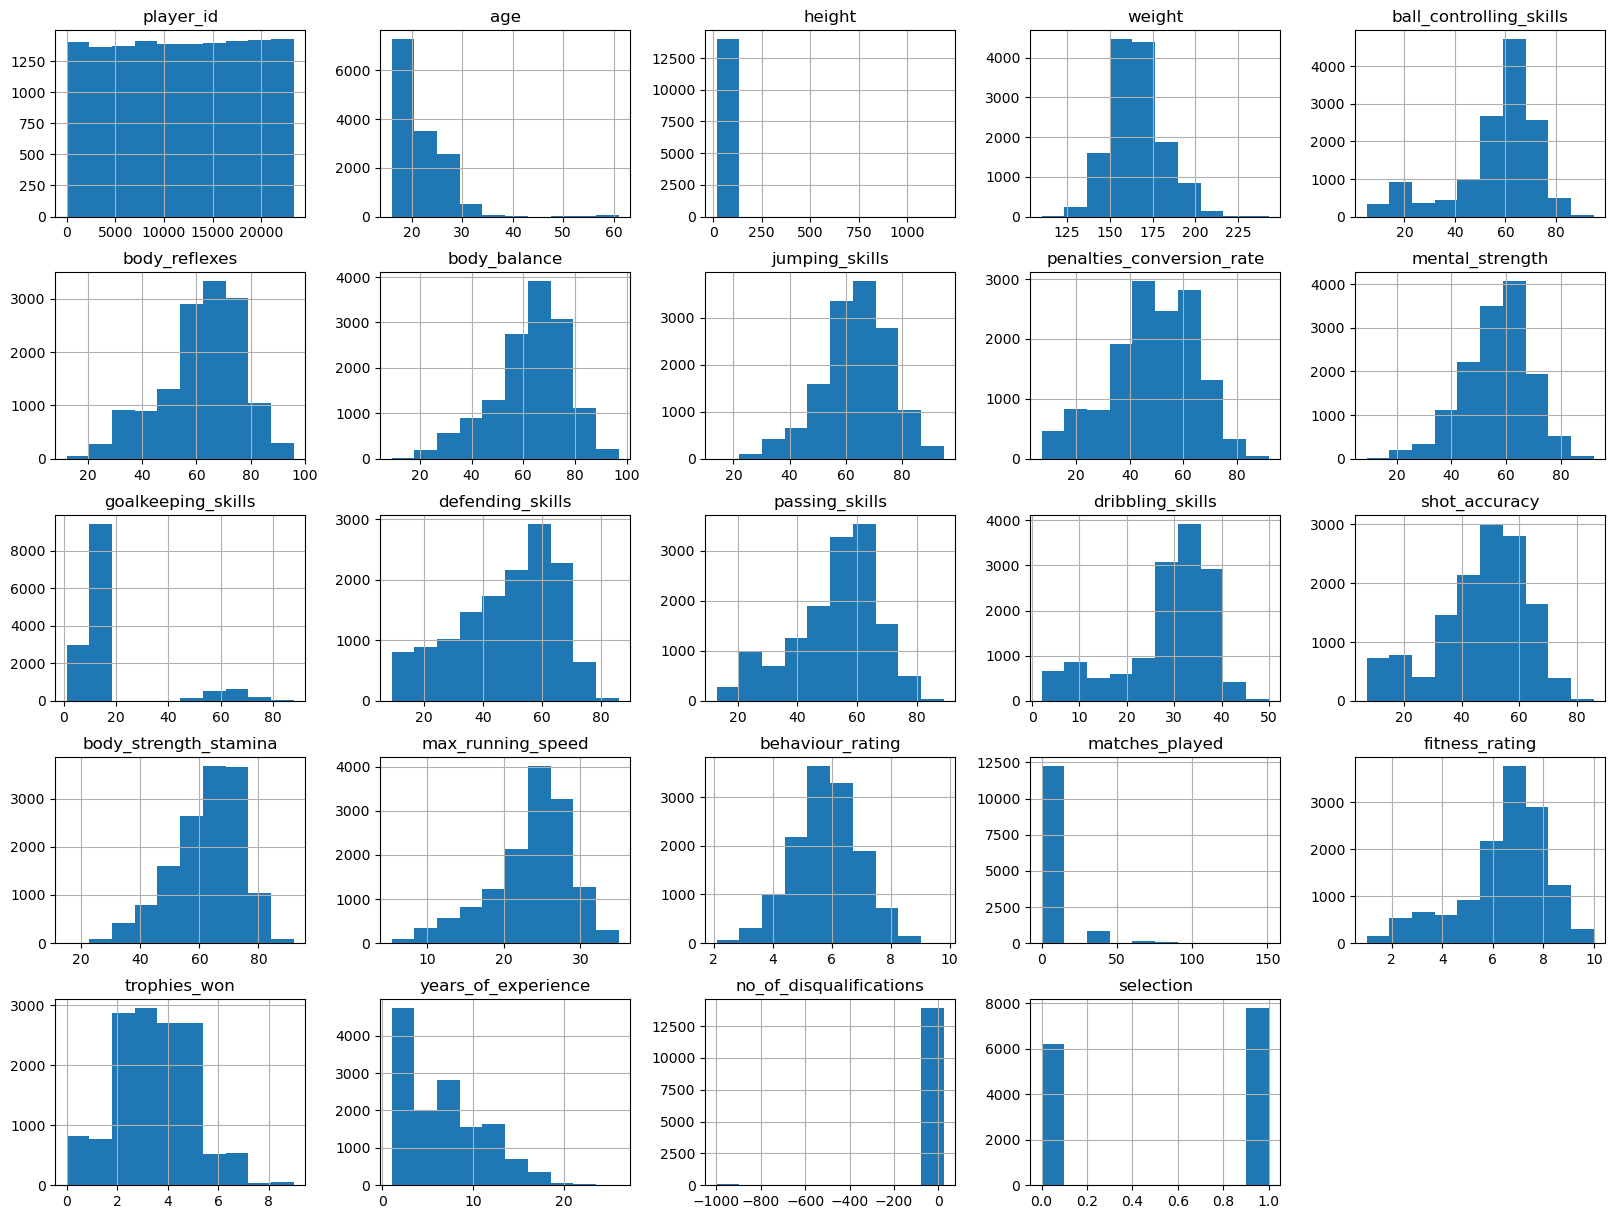

In [13]:
# Plot the frequency graph to show the distribution
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [14]:
# display the columns
data.columns

Index(['player_id', 'age', 'gender', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [15]:
# Replace missing values with the median
for col in ['ball_controlling_skills','jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'shot_accuracy', 'body_strength_stamina','behaviour_rating',
       'matches_played', 'fitness_rating','years_of_experience']:
    data[col]=data[col].fillna(data[col].median())

In [16]:
# Replace missing values with mode
for cols in ['gender','weight','strong_foot','coaching']:
    data[cols]=data[cols].fillna(data[cols].mode()[0])

In [17]:
data.isnull().sum()

player_id                    0
age                          0
gender                       0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [18]:
data.dtypes

player_id                      int64
age                            int64
gender                        object
height                         int64
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
years_of_experience          float64
no_of_disqualifications      float64
s

In [19]:
data.select_dtypes(include=['object']).nunique()

gender              2
strong_foot         4
dedication_level    3
coaching            4
dtype: int64

In [20]:
data['gender'].value_counts()

M    7011
F    6983
Name: gender, dtype: int64

In [21]:
data['gender'] = data['gender'].map({'M': 1, 'F': 0})

In [22]:
# Encode categorical variables in the datasets using one-hot encoding
data = pd.get_dummies(data, columns=['dedication_level','coaching','strong_foot'])

In [23]:
data.dtypes

player_id                      int64
age                            int64
gender                         int64
height                         int64
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
years_of_experience          float64
no_of_disqualifications      float64
selection                      int64
dedication_level_High          uint8
dedication_level_Low           uint8
d

In [24]:
data['selection'].value_counts()

1    7802
0    6192
Name: selection, dtype: int64

In [25]:
# Split data into features (X) and target (y)
X = data.drop('selection', axis=1)
y = data['selection']

In [26]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelling

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [29]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_preds = decision_tree.predict(X_test)

In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)

In [32]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
svm_accuracy = accuracy_score(y_test, svm_preds)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)

In [34]:
# Precision
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
svm_precision = precision_score(y_test, svm_preds, average='weighted')
decision_tree_precision = precision_score(y_test, decision_tree_preds, average='weighted')
random_forest_precision = precision_score(y_test, random_forest_preds, average='weighted')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Recall
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
svm_recall = recall_score(y_test, svm_preds, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_preds, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_preds, average='weighted')

In [36]:
# F1 Score
f1_score_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')
svm_f1_score = f1_score(y_test, svm_preds, average='weighted')
decision_tree_f1_score = f1_score(y_test, decision_tree_preds, average='weighted')
random_forest_f1_score = f1_score(y_test, random_forest_preds, average='weighted')

In [37]:
print("Logistic Regression:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_score_logreg)

Logistic Regression:
Accuracy: 0.735977134690961
Precision: 0.736111669944205
Recall: 0.735977134690961
F1 Score: 0.7343021769514129


In [38]:
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_score_knn)

K-Nearest Neighbors:
Accuracy: 0.5727045373347625
Precision: 0.5703703935064479
Recall: 0.5727045373347625
F1 Score: 0.5706529653278855


In [39]:
print("Support Vector Machine:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1_score)

Support Vector Machine:
Accuracy: 0.5405501964987496
Precision: 0.2921945149348368
Recall: 0.5405501964987496
F1 Score: 0.3793378698064045


In [40]:
print("Decision Tree:")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1_score)

Decision Tree:
Accuracy: 0.7970703822793855
Precision: 0.7968469727625992
Recall: 0.7970703822793855
F1 Score: 0.7968538493347318


In [41]:

print("Random Forest:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1_score)

Random Forest:
Accuracy: 0.8542336548767417
Precision: 0.854154650981336
Recall: 0.8542336548767417
F1 Score: 0.8540670975871998


Fine Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [43]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.8533273782938811


In [44]:
print('After tuning we get Random Forest as the best model')

After tuning we get Random Forest as the best model
